<h1> Has Quarantine Changed Our Queues? </h1>
Understanding the impact of COVID-19 Quarantine on our Spotify streaming <br>

 ANDERS JENSEN, Cornell University <br> 
 KAELA OLSEN, Cornell University <br>

<h4> May 5th, 2020 <br>
Info 2950: Intro to Data Science </h4>

<h2> Introduction </h2>

<p> In the span of a few months, the global economy, and more importantly, livelihoods of everyday people, completely shut down due to the world-wide spread of COVID-19. Quarantine has looked different for everyone, but isolating oneself at home for a long period of time is certainly boring and tedious. Many researchers are investigating potentially negative, psychological effects of this experience. Longer quarantine duration is being linked to frustration, boredom, and depression, in addition to the financial losses many families are enduring. These hypotheses are speculative, and it’s imperative that more research is done to assess the effect quarantine is having on people’s mental health.</p> 

<p> Before this pandemic, a common outlet for people to release some stress was to turn to music. Listening to music is often soothing for people under any circumstances, and has become a routine part of the day. Further, access to music has become extremely easy. Spotify is the largest subscription music streaming service with 170 million users, providing premium audio quality at 320kbps, higher than any competitor, including Apple music.</p> 


<h4>Research Questions:</h4> For the purpose of this research study, we would like to analyze the effect that the COVID-19 quarantine has had on people's music choices, and use Spotify as a way to track the changes. By analyzing the specific audio features of the songs people are listening to while isolated, we can illustrate how this quarantine has affected the mental well-being of everyday people. Has the quarantine made people listen to more sad and depressing music? Or, rather, are people listening to more uplifting music? How has the pandemic affected what type of music we are listening to? Is dance music less popular?

<h4>Main Findings:</h4> The audio features of the quarantine dataset varied in a number of ways from the 2019 dataset. The music we are listening to in isolation had 9.09% less energy, 4.53% less valence, and a 2.31% slower tempo. Acoustic (+10.86%) and speechy (+14.32%) music was more common, while the percentage of explicit songs nearly doubled (+88.36). Meanwhile, danceability, key, and modality had small, hard to explain changes, leaving much room for inference.

To understand how statistically significant our data is, we implemented two tests: permutation tests (also known as randomization tests), and a two sample t-test for sample means. Our null hypothesis, for all variables, was that there was no difference between the means for our 2019 songs sample and a Quarantine songs sample. If our null hypothesis is true, then the permuted (randomized) data sets should give roughly the same test-statistic as our real data. The ranking of our real test-statistic among the shuffled test statistics gives a p-value, which we compared to our p-value found through a t-test of sample means.

In summary, there is statistically significant evidence to suggest that people's music choices have changed during the quarantine.

<h2> Data Description </h2>
<br>
This dataset was created to measure the effect that COVID-19 quarantine has had on people's music choices. Further, by analyzing the specific characteristics of the songs extracted, we will illustrate how this quarantine has affected the mental well-being of everyday people. 

Spotify funded the creation of the dataset. Spotify is an audio streaming platform that provides easy access to over 50 million tracks, allowing users to filter by artist, album, or genre, as well as create unique playlists to complement their music taste. Individuals who create an account on Spotify (and potentially purchase Spotify premium for unlimited free downloads) agree to share their listening data with the public. 

However, most users themselves fail to notice the detail at which their data is collected. Despite the app’s transparency, users are unaware of or fail to notice the exact details of the data collection process: precisely what, how, why, and when data is being collected. 

This collected user data is used to improve algorithms that offer music recommendations to users, but also provides an opportunity for research on user data. To that end, the creation of this dataset was made possible by Spotify's Web API, through which web developers can access catalog data for the creation of apps, software, ect.

There are various processes that influenced what data was observed and recorded. The first factor is whether a playlist was public or not, as we only collected data on public playlists. Secondly, we filtered “quarantine” playlists based on if their title and playlist description contained "quarantine," and our “2019” playlists with the term “2019.” However, this could have been altered by using "Coronavirus" or "COVID" instead of “quarantine.” However, the addition of terms would overload our dataset, so we only used “quarantine.” Another process that influenced data observation was the search limitations on Spotify, which only lets users receive two thousand results per search with Spotify API, limiting the number of data points we could record and analyze. 

The preprocessing that Spotify did was pairing each playlist and each song with a Uniform Resource Identifier (URI). Spotify matches each URI with the playlist name, and within each playlist unit, lists each track and its relevant data. Through accessing the URI’s, we can see the data paired for each. 

After searching “quarantine”- and “2019”-containing playlists, we extracted the playlist names, URIs, and track numbers, loading it into playlists.csv. Then, for each playlist URI, we used Spotipy’s playlist_tracks() to extract each track’s URI. Once we had the list of raw track data, we created a function called filter_data(), which used Spotipy’s track() to access the name, popularity, release date, and explicitness of each song, and then Spotipy's audio_features() function to access variables like "danceability," "energy," "key," and "loudness", loading them into two csv files:  tracks.csv and tracks_2019.csv. In both datasets, each observation (row) represents a song that was contained in a playlists with either the keyword “quarantine” or “2019” in the title or description, respectively. There were 24 columns for each song, including the URI, the release date, and several audio features.

Our Source data can be found in our Github folder under the name “datascraping.ipynb”

<h2> Housekeeping </h2>
<p> For the sake of readability and ease of use, we are going to implement our imports and functions first. This way, the function code does not jumble to data analysis. 

In [1]:
#import python libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, t

In [2]:
# def pie(breakdown, feature, data_name, labels, colors):
#     fig1, ax1 = plt.subplots()
#     ax1.pie(breakdown, 
#             explode = (0.1, 0),  
#             autopct = '%1.1f%%', 
#             colors = colors,
#             shadow = True, 
#             startangle=90)
    
#     plt.legend(labels, loc="best")
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     plt.title(data_name + feature)
#     plt.show()

In [3]:
# labels = ['Major', 'Minor']
# colors = ['#1DB954', 'darkgrey']
# #breakdown = modality_breakdown_2019
# feature = 'mode'
# data_name = '2019'
# #pie(breakdown, feature, data_name, labels, colors)

<h2> Data Analysis </h2>
<p> To begin, let's take a look at the two data sets that will be compared for the subsequent analysis. </p>

<h4> Quarantine Tracks: </h4>

In [4]:
tracks_quar = pd.read_csv("tracks_list.csv")
#shows a snipit of the data set (20 songs), sorted by appearances
tracks_quar.sort_values(by=['count'], ascending=False)[:20]

,Unnamed: 0,uri,count,name,release_date,popularity,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
119,221,spotify:track:127QTOFJsJQp5LbJbu3A1y,176,Toosie Slide,2020-04-03,99,True,0.834,0.454,1,...,0.000006,0.1140,0.837,81.618,audio_features,127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,247059,4
146,259,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,172,Sunday Best,2019-01-06,96,False,0.878,0.525,5,...,0.000000,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4
1002,2564,spotify:track:7eJMfftS33KTjuF7lTsMCx,155,death bed (coffee for your head) (feat. beabad...,2020-02-08,99,False,0.726,0.431,8,...,0.000000,0.6960,0.348,144.026,audio_features,7eJMfftS33KTjuF7lTsMCx,https://api.spotify.com/v1/tracks/7eJMfftS33KT...,https://api.spotify.com/v1/audio-analysis/7eJM...,173333,4
116,218,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,151,Don't Start Now,2019-10-31,97,False,0.794,0.793,11,...,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4
1006,2569,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,147,The Box,2019-12-06,99,True,0.896,0.586,10,...,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
1753,6284,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,139,Blinding Lights,2020-03-20,100,False,0.514,0.730,1,...,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
118,220,spotify:track:0sf12qNH5qcw8qpgymFOqD,136,Blinding Lights,2019-11-29,93,False,0.513,0.796,1,...,0.000209,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4
144,257,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,133,Say So,2019-11-07,97,True,0.787,0.673,11,...,0.000004,0.0904,0.786,110.962,audio_features,3Dv1eDb0MEgF93GpLXlucZ,https://api.spotify.com/v1/tracks/3Dv1eDb0MEgF...,https://api.spotify.com/v1/audio-analysis/3Dv1...,237893,4
846,1723,spotify:track:6K4t31amVTZDgR3sKmwUJJ,132,The Less I Know The Better,2015-07-17,86,True,0.640,0.740,4,...,0.006780,0.1670,0.785,116.879,audio_features,6K4t31amVTZDgR3sKmwUJJ,https://api.spotify.com/v1/tracks/6K4t31amVTZD...,https://api.spotify.com/v1/audio-analysis/6K4t...,216320,4
433,809,spotify:track:4nK5YrxbMGZstTLbvj6Gxw,130,Supalonely,2019-11-15,95,True,0.863,0.631,7,...,0.000030,0.1230,0.817,128.977,audio_features,4nK5YrxbMGZstTLbvj6Gxw,https://api.spotify.com/v1/tracks/4nK5YrxbMGZs...,https://api.spotify.com/v1/audio-analysis/4nK5...,223480,4


---

<h4> Tracks from 2019: </h4>

In [7]:
tracks_2019 = pd.read_csv("tracks_list_2019.csv")
tracks_2019.sort_values(by=['count'], ascending=False)[:20]

,Unnamed: 0,acousticness,analysis_url,count,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,time_signature,track_href,type,uri,valence
937,1650,0.32800,https://api.spotify.com/v1/audio-analysis/2Fxm...,183,0.701,194088,0.425,False,2Fxmhks0bxGSBdJ92vM42m,0.130000,...,bad guy,92,2019-03-29,0.3750,135.128,4,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,0.562
803,1415,0.03700,https://api.spotify.com/v1/audio-analysis/0TK2...,149,0.759,190960,0.540,False,0TK2YIli7K1leLovkQiNik,0.000000,...,Señorita,88,2019-06-21,0.0287,116.947,4,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,0.750
1570,3059,0.11000,https://api.spotify.com/v1/audio-analysis/5w9c...,146,0.737,193227,0.860,False,5w9c2J52mkdntKOmRLeM2m,0.000002,...,Con Calma,83,2019-01-24,0.0593,93.989,4,https://api.spotify.com/v1/tracks/5w9c2J52mkdn...,audio_features,spotify:track:5w9c2J52mkdntKOmRLeM2m,0.656
1408,2475,0.08460,https://api.spotify.com/v1/audio-analysis/2ksO...,140,0.786,301714,0.808,False,2ksOAxtIxY8yElEWw8RhgK,0.000289,...,China,86,2019-07-19,0.0882,105.027,4,https://api.spotify.com/v1/tracks/2ksOAxtIxY8y...,audio_features,spotify:track:2ksOAxtIxY8yElEWw8RhgK,0.609
1571,3060,0.39000,https://api.spotify.com/v1/audio-analysis/2qG5...,130,0.882,161627,0.689,False,2qG5sZ7Si6sdK74qLxedYM,0.003250,...,Con Altura,82,2019-03-28,0.1240,97.963,4,https://api.spotify.com/v1/tracks/2qG5sZ7Si6sd...,audio_features,spotify:track:2qG5sZ7Si6sdK74qLxedYM,0.746
1407,2473,0.03340,https://api.spotify.com/v1/audio-analysis/6cy3...,128,0.721,221714,0.716,True,6cy3ki60hLwimwIje7tALf,0.000840,...,RITMO (Bad Boys For Life),89,2019-10-12,0.0657,104.994,4,https://api.spotify.com/v1/tracks/6cy3ki60hLwi...,audio_features,spotify:track:6cy3ki60hLwimwIje7tALf,0.667
1757,3571,0.01250,https://api.spotify.com/v1/audio-analysis/6WrI...,111,0.794,183290,0.793,False,6WrI0LAC5M1Rw2MnX2ZvEg,0.000000,...,Don't Start Now,94,2019-10-31,0.0842,123.941,4,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,audio_features,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,0.677
1374,2416,0.29500,https://api.spotify.com/v1/audio-analysis/7k4t...,110,0.803,200960,0.715,False,7k4t7uLgtOxPwTpFmtJNTY,0.000134,...,Tusa,93,2019-11-07,0.2980,101.085,4,https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...,audio_features,spotify:track:7k4t7uLgtOxPwTpFmtJNTY,0.574
832,1463,0.09120,https://api.spotify.com/v1/audio-analysis/3HVW...,110,0.798,219947,0.675,False,3HVWdVOQ0ZA45FuZGSfvns,0.000000,...,I Don't Care (with Justin Bieber),86,2019-05-10,0.0442,101.956,4,https://api.spotify.com/v1/tracks/3HVWdVOQ0ZA4...,audio_features,spotify:track:3HVWdVOQ0ZA45FuZGSfvns,0.842
1421,2496,0.60000,https://api.spotify.com/v1/audio-analysis/2TH6...,110,0.610,250534,0.624,True,2TH65lNHgvLxCKXM3apjxI,0.000002,...,Callaita,86,2019-05-31,0.3090,176.169,4,https://api.spotify.com/v1/tracks/2TH65lNHgvLx...,audio_features,spotify:track:2TH65lNHgvLxCKXM3apjxI,0.244


<h2> I. Describing Music: Qualitative Audio Features</h2>

In order to best understand the music people listen to, Spotify provides audio analysis for all tracks in the Spotify Catalog. The analysis is broken up into certain features that desibe a song's structure and musical content (like rythm, pitch, timbre, etc). Specifically, each element is denoted by an integer or float that scores a certain characteristic of a given song. 
For the purpose of this research study, we will analyze 10 key audio features in detail, and compare the scores of these audio features from playlists made during quarentine to the top songs in 2019 (before the COVID-19 pandemic began). 


To start, We will look at four charactersitcs which we consider <em> straightforward </em> and <em>qualitative</em>. In other words, musicians and listeners alike can completely capture these features in a couple words. Note, Spotify scores these featues as integers, while the other six characteristics are scored as floats. The descriptions of each these features are summarized from Spotify's Web API reference guide. Thus, to begin, this initial analysis looks at:

1. **Popularity** - The popularity of a song is the most complex feature in this section of analysis, but Spotify still assigns this feature an integer value (specifically, between 0 and 100) and we consider it a qualititative description of a song. The popularity is calculated by an algorithm based mainly on the number of times a track has been played as well as how recent the song has been played. The Spotify Web API reference guide notes that "generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past." We recognize that there is also a score for artist and album popularity, but these are derived independently from track popularity and thus will not affect our subsequent analysis. 


2. **Explicitness**  - Spotify labels a song as explicit if the lyrics or content of the song meet a list of criteria which is considered unsuitable for childrien (such as strong language and references to violence or sexualized behavior). This audio feature gives explicit songs given a score of 1, while non-epxlicit songs are given a 0, making making analysis straightforward. 


3. **Key** - The estimated overall key of the track. This audio feature maps picthes using standard pitch class   notation. For example, 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, Spotify gives the song a value of -1, but this is a rarity.  


4. **Modality** - Modality refers to the mode of a track (major or minor), the type of scale from which its melodic content is derived. Major is represented by 1 and minor is represented by a 0 score.

<h3><em> Evaluating Statistical Significance</em> </h3>
To test our null hypothesis, we need to see if changing the explanatory variable has an effect on the outcome variable. If our null hypothesis is true, then shuffling the explanatory variable, a 2019 or Quarantine song, would have no effect on the outcome. We randomly shuffled the exposures in each trial, using 500 trials for each variable, making up 500 “fake” samples. For each “fake” sample, we found the test statistic for that sample, and graphed the distribution of the trials’ sample differences. Then, the ranking of the real test-statistic for our data among the shuffled test-statistic gave us our p-value, which we compared to an alpha-level of 0.05. To double check our p-value from our permutation tests, we did a t-test and compared the results of the permutation test on differences of sample means.

<h3> 1. Popularity </h3>

<p> One of the first questions about quarantine songs is whether or not the songs' appearances in quarantine playlists is due to pure general popularity on spotify. To understand this, it's helpful to look at the popularity variable. However, while we analyze this variable for our quarantine dataset, doing the same for our top 2019 songs data would not provide fruitful results, as every song it contains is, by definition, extremely popular given the nature of the playlist. Thus, we will take a look solely at the popularity statistics of our quarantine dataset, as this is the data that will guide us to understanding the impact of popularity on the appearances of our quarantine songs. </p>

<p> Does popularity impact the number appearences in quarantine playlists? To answer this question, we will see if there is a correlation between a track's popularity level, and the number of times that song appears in the data set. </p>

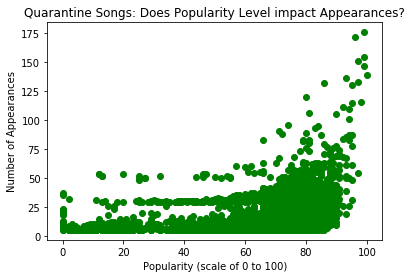

In [8]:
plt.scatter(tracks_quar['popularity'], tracks_quar['count'], marker = 'o', color = 'green')

plt.xlabel("Popularity (scale of 0 to 100)")
plt.ylabel("Number of Appearances")
plt.title("Quarantine Songs: Does Popularity Level impact Appearances?")
plt.show()

<p> There seems to be a clear positive relationship with these two variables. However, it doesn't seem exactly linear. We are interested in understanding the strength of correlation between these two variables. We'll use a variant called rank correlation, where each element of a vector has a rank. </p>

<p>Rank correlation (or Spearman correlation) is very similar to regular correlation (also called Pearson correlation), but it is more robust to relationships that aren't linear. Pearson correlation is to rank correlation as mean is to median. In both cases we can replace the actual value in an array with its *rank* in the array. The median is the value that has the mean rank (ie the midpoint), while the rank correlation is the Pearson correlation between the rank of $X_i$ and the rank of $Y_i$. <p>

<p>The following code defines datapoints that nearly lie on a line and calculates the slope of a regression line fit to the data. </p>

In [9]:
linear_model = LinearRegression().fit(tracks_quar[['popularity']], tracks_quar[['count']])
print("Linear model slope: {:.6f}".format(float(linear_model.coef_[0])))

Linear model slope: 0.220464


For each 1 point increase in popularity, the number of times the song appears in a quarantine playlist increases by roughly 0.22. Being more popular makes a song more likely to appear in quarantine playlists and thus our dataset of quarantine tracks. Let's see how well the data fits this linear model.

We can do this by looking at the correlation of:
1. the track counts and the track popularity
2. the *ranks* of the track counts and the *ranks* of the tracks popularity

In [10]:
print("Comparing Correlations for Popularity and Appearances")

corrcoef = np.corrcoef(tracks_quar['popularity'], tracks_quar['count'])[0][1]
rank_corrcoef = np.corrcoef(tracks_quar['popularity'].rank(), tracks_quar['count'].rank())[0][1]

print('Correlation: {:.4f}'.format(corrcoef))
print('Correlation of ranks: {:.4f}'.format(rank_corrcoef))

Comparing Correlations for Popularity and Appearances
Correlation: 0.2644
Correlation of ranks: 0.4717


As we can see, the correlation of ranks is much higher than the linear correlation. This makes sense, as we previously noted that the data is not exactly linear. By comparing the ranks, we can see how the more popular a song is in comparison to the rest of the songs, the more likely it is to be ranked higher in its number of appearances in our quarantine playlists.

<h4> Popularity Conclusion </h4>

<p> From the graphical visualization, it is clear that there is a positive relationship between popularity and the number of appearances in playlists. These two variables are clearly interconnected, as the more popular a song is, the wider its audience, the more well-known it is, and the more likely it is to appear in any one person's playlist. However, our correlation is quite small. This could be due to the fact that the data does not quite fit a linear model, as there is clear curvature in the graph. As such, the Spearman R of rank correlation is much higher than the standard linear correlation. Still, the Spearman r is not quite as high as initially expected. Despite this, through understanding of the data's context and the graphical representation of the data, it is concluded that popularity does impact the number of appearances the songs appeared in our quarantine tracks. Onward! </p>

---

<h3>2.  Explicitness </h3>

<p> Let's take a look at how many of the quarantine songs, as well as the 2019 songs, were explicit. </p>
<p>**Our Hypothesis:** We do not expect a large difference in the two dataset. Perhaps the quarantine playlists were slightly more explicit, but this would probably be due to chance. </p>

In [11]:
#function that creates pie chart for the explicit variable
def pie_explicit(dataset, data_name):
    count = 0
    for i in dataset['explicit']:
        if i == 1:
            count += 1
    percent_explicit = count/len(dataset['explicit'])
    
    explicit =  (percent_explicit*100)
    clean = (1-percent_explicit)*100
    
    labels = 'Explicit', 'Clean'
    fig1, ax1 = plt.subplots()
    
    ax1.pie([explicit, clean], 
            explode = (0, 0.1), 
            autopct='%1.1f%%', 
            colors = ['#1DB954', 'darkgrey'],
            shadow=True, 
            startangle=90)

    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.legend(labels, loc="best")
    plt.title("What proportion of " + data_name + " were explicit?")
    plt.show()
    
    #explicit_breakdown = {'explicit': explicit, 'clean': clean}
    explicit_breakdown = [explicit, clean]
    return explicit_breakdown

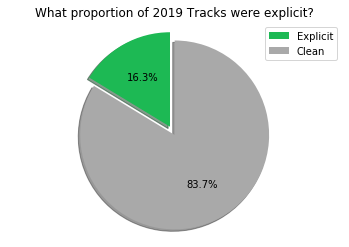

In [12]:
#2019 Tracks
explicit_2019 = pie_explicit(tracks_2019, '2019 Tracks')

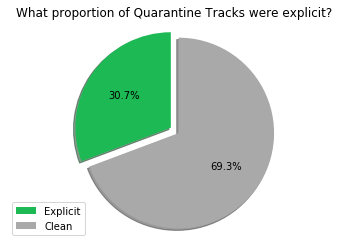

In [13]:
#Quarantine Tracks
explicit_quarantine = pie_explicit(tracks_quar, "Quarantine Tracks")

In [14]:
#reusable function for bar chart creation, comparing a variable across two data sets
def bar_chart(data_2019, data_quar, title, ticks):
    
    bars2019 = data_2019 #green
    barsquar = data_quar #gray
    
    barWidth = 0.3
    r1 = np.arange(len(bars2019))
    r2 = [x + barWidth for x in r1]
    
    plt.bar(r1, bars2019, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
    plt.bar(r2, barsquar, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')
    
    plt.xlabel('Tracks')
    plt.ylabel('Percentage of Total')
    plt.title(title)
    plt.xticks([r + 0.15 for r in range(len(bars2019))], ticks)
    
    plt.legend()
    plt.show()

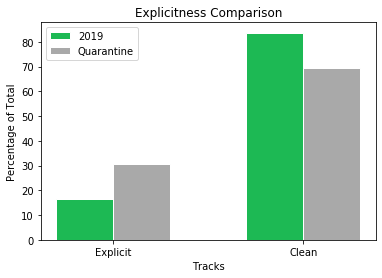

In [15]:
#Bar Chart comparison across 2019 and Quarantine Data
bar_chart(explicit_2019, explicit_quarantine, title = "Explicitness Comparison", ticks = ['Explicit', 'Clean'])

In [16]:
def print_percentages(feature, primary_feature):
    print("Proportion of 2019 songs that are "+str(primary_feature)+":  ")
    print('{:.4f}'.format(np.mean(tracks_2019[feature])))
    
    print("Proportion of Quarantine songs that are "+str(primary_feature)+":  ") 
    print('{:.4f}'.format(np.mean(tracks_quar[feature])))
    
    print()
    print("Difference in proportions from 2019 to Quarantine:")
    print('{:.4f}'.format(np.mean(tracks_quar[feature])-np.mean(tracks_2019[feature])))

    print("Percent change from 2019 to Quarantine:")
    print('{:.2%}'.format((np.mean(tracks_quar[feature])-np.mean(tracks_2019[feature]))/np.mean(tracks_2019[feature])))

In [17]:
print_percentages('explicit', primary_feature = 'Explicit')

Proportion of 2019 songs that are Explicit:  
0.1631
Proportion of Quarantine songs that are Explicit:  
0.3071

Difference in proportions from 2019 to Quarantine:
0.1441
Percent change from 2019 to Quarantine:
88.36%


The difference in the proportion of explict songs is the key test-statistic for us. We want to hold onto this for future reference, so we are going to create a function that returns the difference in the proportions of our two samples.

In [18]:
def sample_difference(feature):
    _quarantine = np.mean(tracks_quar[feature])
    _2019 = np.mean(tracks_2019[feature])
    difference = _2019 - _quarantine
    return round(difference, 6)

In [19]:
sample_difference('explicit')

-0.144075

This means the proportion of explicit songs decreased by 0.14% of songs from the 2019 dataset to the Quarantine dataset. Next, we must test its statistical significance.

<h4> Evaluation of Significance: Explicitness </h4> 

To understand the breakdown between 2019 songs and Quarantine songs, we need to make a single dataframe, where the two datasets are concatenated, and include a new column called "quarantine", where a song's row has a "0" if the song is from the 2019 dataset, and a "1" if the song is from the Quarantine dataset. We do this with concatenate_df( ).

In [20]:
def concatenate_df():
    #creating a list of zeros for each song in 2019 tracks
    zero_list = []
    for x in range(len(tracks_2019)):
        zero_list.append(0)
    
    #creating a list of ones for each song in quarantine tracks
    one_list = []
    for x in range(len(tracks_quar)):
        one_list.append(1)  

    #adding these lists as a column to respective dataframes
    df_quarantine = tracks_quar.assign(quarantine = one_list)
    df_2019 = tracks_2019.assign(quarantine = zero_list)
    
    #concatenating the two dataframes
    new = pd.concat([df_quarantine, df_2019], sort=False)
    
    #turning explicit column from True / False to 1 / 0
    new["explicit"] = new["explicit"].astype(int)
    return new

In [21]:
#creating a new dataframe that combines the 2019 and quarantine datasets
new = concatenate_df()

Now that we have the concatenated dataframe, we can shuffle the "quarantine" colummn, and thus shuffle the explanatory variable, to see if it influences the shuffled data-set's outcome variable. 

We do this through the permuted_diff_list() function, which shuffles the explanatory variable (the "quarantine" column), essentially reassigning the 'quarantine or not quarantine' explanatory variable values to each outcome value. Then, it reseparates the newly assigned 'quarantine' and 'not quarantine' songs, finds the mean value for each sample, and finds the difference between the two sample means. It does this experiment 500 times, performing the permutation for 500 trials, and returns the list of 500 differences of means for the permuted samples.

In [22]:
#returns a list of the permuted differences for 500 trials for the parameter *feature*
def permuted_diff_list(feature):
    
    trials = 500
    diff_list = []
    for x in range(trials):
        
        new['quarantine'] = np.random.permutation(new["quarantine"].copy())

        list_2019 = [] # when 0 means 2019 songs
        list_quar = [] # when 1 means quarantine songs

        for i in range(len(new)):
            if new['quarantine'].iloc[i] == 0:
                list_2019.append(new[feature].iloc[i])
            else:
                list_quar.append(new[feature].iloc[i])
                
        diff_list.append(np.mean(list_2019) - np.mean(list_quar))
        
    return diff_list

In [23]:
explicit_data = permuted_diff_list(feature = 'explicit')

Now that we have run the permutation 500 times, we can plot the distribution of differences of sample means from our 500 permutations, and compare it to the actual difference of sample means from our real data.

In [24]:
#https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
def plot_permuted_diff(feature, data, sample):    
    plt.hist(data, bins=50)
    plt.title("Differences In "+str(feature)+" Means From 500 Permutations")
    plt.axvline(sample, color='k', linestyle='dashed', linewidth=1)
    plt.text(sample,15,'  {:.4f}'.format(sample))
    plt.xlabel('Differences')
    plt.ylabel('Count')
    plt.show()
    
    print("The dashed line represents the difference in our sample means.")

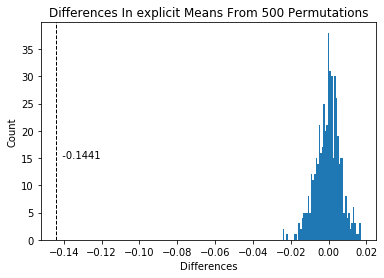

The dashed line represents the difference in our sample means.
The difference in means of our data:  -0.144075


In [26]:
plot_permuted_diff(feature = 'explicit', data = explicit_data, sample = sample_difference('explicit'))
print("The difference in means of our data: ", sample_difference('explicit'))

Clearly, the difference in means found in our data is very far from the distribution of permuted differences. Thus, the difference in the proportion of songs that are explicit from 2019 to Quarantine definitely appear significant. Let's see what it's p-value is. We can find the p-value by comparing our test statistic to the distribution of permutated differences, by counting its ranking against the shuffled test-statistics, essentially seeing how far outside the distribution it is.

In [27]:
def permutation_p_value(data, feature):
    trials = 500
    count = 0
    for d in data:
        if d > abs(sample_difference(feature)):
            count += 1
    p_value = format((count/trials), '.8f')

    print("Permutation Test Results")
    print(".....")
    print("p_value: ", p_value)

In [28]:
permutation_p_value(data = explicit_data, feature = 'explicit')

Permutation Test Results
.....
p_value:  0.00000000


Clearly, this is an extremely low p-value. This essentially means that given our null hypothesis (that there is no difference in means) is true, there is a 0% chance we would see these results due to random variation. This p-value is well below our alpha-level of 0.05. Thus, we reject the null hypothesis that there is no difference in means, and accept the alternative, that there is a difference. 

Let's double check this p-value with the results of a t-test for two sample means. The function below performs a two-sample t-test with an alpha level of 0.05, and prints the key test results. 

In [29]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
#https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
def t_test_means(feature):
    
    alpha = 0.05
    
    #sample size
    n_2019 = len(tracks_2019[feature])
    n_quar = len(tracks_quar[feature])
    
    #standard error
    se_2019 = tracks_2019[feature].std()/np.sqrt(n_2019)
    se_quar = tracks_quar[feature].std()/np.sqrt(n_quar)
    
    #standard error of differences
    sed = np.sqrt(se_2019**2 + se_quar**2)
    
    #t-statistic
    t_stat =(np.mean(tracks_2019[feature])-np.mean(tracks_quar[feature]))/sed
    
    #degrees of freedom
    df = n_2019 + n_quar - 2

    #critical value using scipy ppf (percent point function)
    cv = t.ppf(1.0-alpha,df)

    #p-value using scipy cdf (cumulative distribution function) for t-distribution 
    p = (1-t.cdf(abs(t_stat), df))**2
    
    print("T-Test Results")
    print(".....")
    print("T-Statistic: " +str(t_stat))
    print("Degress of Freedom: " +str(df))
    print("Critical Value: " +str(cv))
    print("p-value: {:.8f}".format(p))

In [30]:
t_test_means('explicit')

T-Test Results
.....
T-Statistic: -22.100686565206274
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


Note: We will use this statistical significance test in each of the folloring audio feature sections.

<h4> An Explicit Conclusion? </h4>
<p> Based on the data above, there is a clear change in the amount of explicit content people are listening to during quarantine. Only  16.3% of the 2019 songs featured explicit content, while that nearly doubled to to 30.7% during quarantine (a 14% difference in proportions). Furthermore, this difference is certainly statistically signficant, as both the p_value when running simulations as well as when conducting a T-test yielded a result approaching 0 (0.000000...x). Given the drastic percentage change, it is logical that it was almost impossible that this was due to random chance. </p>


<p> In sum, explicit music has almost doubled... and we thought people were being clean during quarantine!
Jokes aside, this is an interesting conclusion to start with, but we will need more audio features to fully draw out the effects of this pandemic on our music choices. </p>

---

<h3> 3. Key </h3> 

<p> **Our Hypothesis:** We do not expect to see significant change in the keys of songs. The most popular keys are stylistic choices that artists choose based on what sounds best. It is unlikely that quarantine alters our interest in music enough to see significant change in keys. With this prediction in mind, let's take a look... </p> 

In [31]:
#Counts the number of songs with each key, returns the percentage of total
def key_breakdown(dataset):
    count_0 = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    count_6 = 0
    count_7 = 0
    count_8 = 0
    count_9 = 0
    count_10 = 0
    count_11 = 0
    for i in dataset['key']:
        if i == 0:
            count_0 += 1
        if i == 1:
            count_1 += 1
        if i == 2:
            count_2 += 1
        if i == 3:
            count_3 += 1
        if i == 4:
            count_4 += 1
        if i == 5:
            count_5 += 1
        if i == 6:
            count_6 += 1
        if i == 7:
            count_7 += 1
        if i == 8:
            count_8 += 1
        if i == 9:
            count_9 += 1
        if i == 10:
            count_10 += 1
        if i == 11:
            count_11 += 1
    key_counts = [count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7, count_8, count_9, count_10, count_11]
    key_percentage = []
    for count in key_counts:
        key_perc = (count/len(dataset['key']))*100
        key_percentage.append(key_perc)
    return key_percentage

In [38]:
#Creates a pie chart for the keys
def key_pie(key_breakdown, data_name):
    
    labels = 'C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'
    fig1, ax1 = plt.subplots()

    ax1.pie(key_breakdown, 
            explode= (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
            colors = ["#FFD699", "#FFB266", "#FFFF99", "#CCFF99", "#99FFFF", "#9933FF", "#009999", "#99CCFF", "#FF99CC", "#FF0077", "#FFFF00", "#E0E0E0", "#999FF"], 
            autopct='%1.0f%%',
            shadow=True, 
            startangle=90)
    
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(labels, loc="best")
    plt.title("What proportion of " + data_name + " were which keys?")
    plt.show()

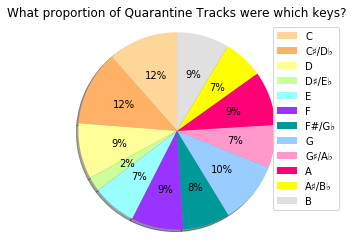

In [39]:
#Quarantine Tracks
key_pie(key_breakdown(tracks_quar), "Quarantine Tracks")

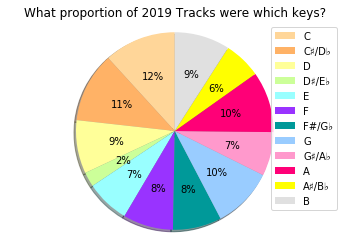

In [40]:
#2019 Tracks
key_pie(key_breakdown(tracks_2019), "2019 Tracks")

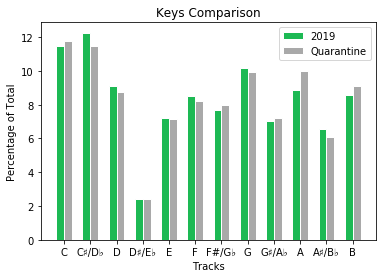

In [41]:
#Bar chart comparing across 2019 and Quarantine Data
bar_chart(key_breakdown(tracks_quar), key_breakdown(tracks_2019), title = "Keys Comparison", ticks = ['C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'])

<h4> Conclusion: Key takaways </h4>

<p> The pie charts illustrates a few things. First, in both quarantine and 2019 datasets, the most popular Key's were C, and C♯/D♭, accounting for nearly 35% of the entire dataset when combined. That being said, the somewhat even distribution of the chart indicates that the key of a song does not have a <em> dramatic </em> effect on the song's success. In other words, there is no one key that dominates music. Stay away from D# though...
    
<p> More importantly, we see almost no change in the two datasets, illustrating that the quarantine has little effect on the key to which songs are written. Our hypothesis was correct. This wasn't the <em> key </em> to our research, unfortunately. </p>

<p> P.S. We hope our puns lighten up your quarantine! </p>

---

<h3> Modality </h3>

<p>**Our Hypothesis:** We expect that the quarentine playlist featured more songs in minor keys, as the eerie nature of being locked at home might make some people more meloncholy, and thus listen to music associated with being sad. We expect this to be statistically one of the most significant changes of all the audio features. Modality is a good mesausre of the "happiness" of a song. This being said, many individuals are finding ways to stay active (especially running) during quarantine. Because running music usually has an upbeat, positive nature, so this may offset the sad nature of self-isolation slightly, but we nonetheless expect modality to decrease.  </p>

In [42]:
def mode_counter(dataset, data_name):
    print(data_name)
    #Major keys are denoted as 1, Minor keys denoted as 0
    #Could combine this function with pie chart function
    count_major = 0
    count_minor = 0
    for i in dataset['mode']:
        if i == 1:
            count_major += 1
        if i == 0:
            count_minor += 1
    
    print("count_major: ", count_major)
    print("count_minor: ", count_minor)
    
    percent_major = count_major/len(dataset['mode'])
    print('percent_major: ','{:.2%}'.format(percent_major))
    
    mode_breakdown = [count_major/len(dataset['mode']), count_minor/len(dataset['mode'])]
    
    return mode_breakdown

In [43]:
def modality_pie(breakdown, data_name):
    labels = 'Major', 'Minor'
    sizes = breakdown
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            explode = (0.1, 0),  
            autopct = '%1.1f%%', 
            colors = ['#1DB954', 'darkgrey'],
            shadow = True, 
            startangle=90)
    
    plt.legend(labels, loc="best")
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(data_name + ": Major or Minor?")
    plt.show()

Quarantine Tracks
count_major:  5576
count_minor:  3368
percent_major:  62.34%


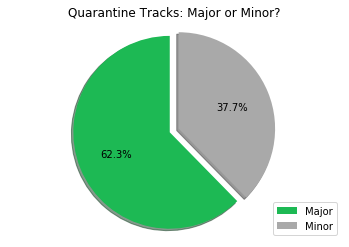

In [44]:
#Quarantine Tracks
modality_breakdown_quarantine = mode_counter(tracks_quar, "Quarantine Tracks")
modality_pie(modality_breakdown_quarantine,"Quarantine Tracks")

2019 Tracks
count_major:  4398
count_minor:  2900
percent_major:  60.26%


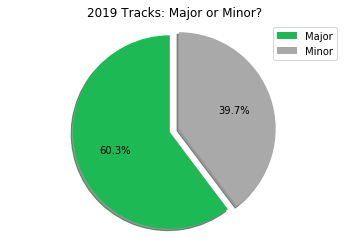

In [45]:
#2019 Tracks
modality_breakdown_2019 = mode_counter(tracks_2019, "2019 Tracks")
modality_pie(modality_breakdown_2019, "2019 Tracks")

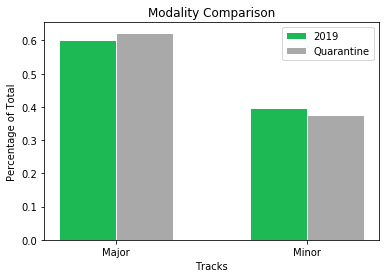

In [46]:
#Bar chart comparing across 2019 and Quarantine Data
bar_chart(modality_breakdown_2019, modality_breakdown_quarantine, title = "Modality Comparison", ticks = ["Major", "Minor"] )

In [47]:
print_percentages('mode', 'Major')

Proportion of 2019 songs that are Major:  
0.6026
Proportion of Quarantine songs that are Major:  
0.6234

Difference in proportions from 2019 to Quarantine:
0.0208
Percent change from 2019 to Quarantine:
3.45%


<h4> Evaluation of Significance: Modality </h4> 

In [48]:
print("The difference in mean modality between Quarantine and 2019 songs:")
print(sample_difference('mode'))

The difference in mean modality between Quarantine and 2019 songs:
-0.020804


In [55]:
modality_data = permuted_diff_list(feature = 'mode')

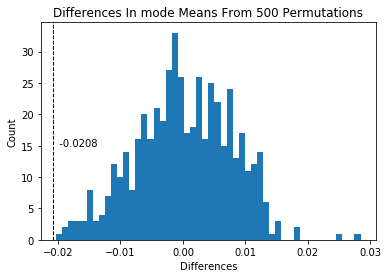

The dashed line represents the difference in our sample means.
The difference in means of our data:  -0.020804


In [57]:
plot_permuted_diff(feature = 'mode', data = modality_data, sample = sample_difference('mode'))
print("The difference in means of our data: ", sample_difference('mode'))

In [59]:
permutation_p_value(data = modality_data, feature = 'mode')

Permutation Test Results
.....
p_value:  0.00400000


In [60]:
t_test_means(feature = 'mode')

T-Test Results
.....
T-Statistic: -2.706863775370696
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00001156


<h4> Conclusion: Does our mood affect the mode? </h4>
<p> Our Hypothesis was incorrect. The Quarantine dataset had, in fact, a 0.02 higher average modality than the 2019's tracks. As we counted songs that were in Minor as 0, and Major in 1, the proportion of songs that were in Major changed by 0.02 from the 2019 dataset to the Quarantine datset. To put simply, the quaranatine songs were more cheery. This is encouraging, becuase it indicates that people might be using music to improve their mood during this difficult time, and our predicition about running music might have played a role as well. The simulations provided a P-value of 0.002, while the T-test provided an even smaller P-value approaching 0.0000. Because our dataset is so large (8000+ songs), a 2% change in modality is statistically significant, and meaningfull. 

---
---

<h2> II. Describing Music: Quantitative Audio Features </h2>

Next, we will analyze six complex audio features that Spotify denotes as floats, providing a sort of road map for each song. These remaining features include: 

5. **Energy** - According to Spotify's WEB API reference guide the Energy of a song "represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy." This is an excellent audio feature to analyze because it says something about the listener. 

  
6. **Danceability** - This audio feature is similair to energy, describing "how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity." 
   
   
7. **Valence** - A song's valence score is "describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)." This feature is particularly useful because it helps us as researchers understand the mood of a listener. While some people enjoy listening to sad music more than others, trend changes are visible when analyzing valence on a sample size of this scale.


8. **Acousticness** -  This is a confidence measure that determines whether a track is acoustic. Scores range from 0.0 to 1.0, providing a spectrum of musical range in between. 


9. **Speechiness** - This feature detects the presence of spoken words in a track. Unlike other categories, this score is especially useful in seperating other forms of audio (talks shows, audio books, poety) from pure musical recordings. Tracks of this nature recive a score close to 1.0. That being said, speechiness is useful in this analysis because it also helps seperate rap-muisc and genres with a high-concentration of speech/vocals from other types of music. The less words in the songs, the closer the speechiness score will get to 0.0


10. **Tempo** - Finally, tempo is the speed or pace of a given song, ervied directly from the average beat duration. It is measured in beats per minute (BPM) 

<h3> 5. Energy </h3>

<p>**Our Hypothesis:** We expect that the the average energy score of the quarantine dataset would have dropped from people's 2019 music choices. This aligns with our prediction that quarantine is having a negative impact of people's mental health and that might be visible in our music. There have been less parties, less gatherings, and less reasons to be moving around. In general, the nature of quarantine <em> primes </em> us to beleive energy, much like modality, would have decreased significantly. 

In [61]:
#creates a box plot that compares one feature across quarantine tracks and 2019 tracks
def box_plot_comparisons(feature):
    
    x = tracks_2019[feature]
    y = tracks_quar[feature] 
    
    data_to_plot = x, y
    fig = plt.figure(1, figsize=(8, 7))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    
    for box in bp['boxes']:
        box.set( color='black', linewidth=2)
        box.set( facecolor = '#1DB954' )
    
    for whisker in bp['whiskers']:
        whisker.set(color='black', linewidth=2)
    
    for cap in bp['caps']:
        cap.set(color='black', linewidth=2)
    
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)
    
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    
    ax.set_xticklabels(['2019 Tracks', 'Quarantine Songs'])
    plt.title(feature + ": Quarantine vs. 2019")
    plt.ylabel("Scale")
    plt.show()

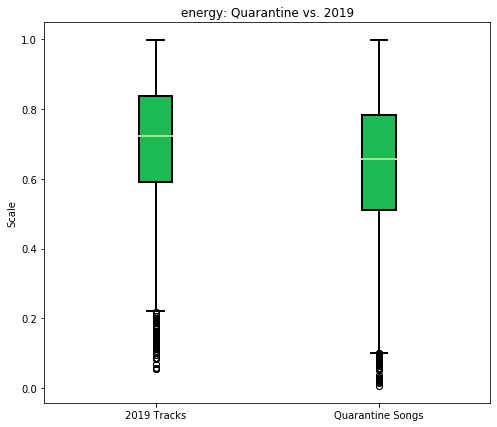

In [62]:
box_plot_comparisons('energy')

In [63]:
def print_means(feature):
    print("Mean "+str(feature)+" value for 2019:  ")
    print('{:.4f}'.format(np.mean(tracks_2019[feature])))
    
    print("Mean "+str(feature)+" value for Quarantine:  ") 
    print('{:.4f}'.format(np.mean(tracks_quar[feature])))
    
    print()
    print("Difference in means from 2019 to Quarantine:")
    print('{:.4f}'.format(np.mean(tracks_quar[feature])-np.mean(tracks_2019[feature])))
    
    print("Percent change from 2019 mean to Quarantine mean:")
    percent_change = (np.mean(tracks_quar[feature])-np.mean(tracks_2019[feature]))/np.mean(tracks_2019[feature])
    print('{:.2%}'.format(percent_change))
          

In [64]:
print_means('energy')

Mean energy value for 2019:  
0.7014
Mean energy value for Quarantine:  
0.6376

Difference in means from 2019 to Quarantine:
-0.0637
Percent change from 2019 mean to Quarantine mean:
-9.09%


<h4> Evaluation of Significance: Energy </h4> 

In [65]:
energy_data = permuted_diff_list(feature = 'energy')

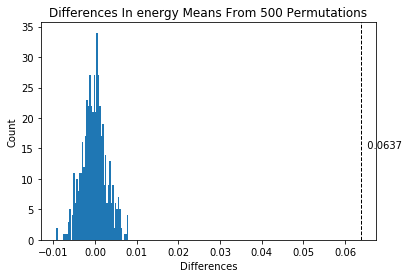

The dashed line represents the difference in our sample means.
The difference in means of our data:  0.063739


In [67]:
plot_permuted_diff(feature = 'energy', data = energy_data, sample = sample_difference('energy'))
print("The difference in means of our data: ", sample_difference('energy'))

In [69]:
permutation_p_value(data = modality_data, feature = 'energy')

Permutation Test Results
.....
p_value:  0.00000000


In [70]:
t_test_means(feature = 'energy')

T-Test Results
.....
T-Statistic: 22.17580623566197
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion: Effect on Energy </h4>
    
<p> Our hypothesis for energy appears to be correct. The average energy of the quarantine dataset decreased by approximately 0.0637 from 2019's data, indicating that the overall loudness, timbre, onset rate, and general entropy of the music was lower. Our simulations provided a p-value approaching 0.000000..., and our t-test provided the same. A 0.637 difference in means is certainly statistically significant, and further guides our conclusions about the effect of isloation on music choice. </p>


---

<h3> 6. Danceability </h3>

<p> **Our Hypothesis:** Our Hypothesis for this audio feature is similair to that of energy. Bars, clubs, venues, and house parties have come to an almost complete stop. It is logical that the average danceability score would have decreased in quarantine.

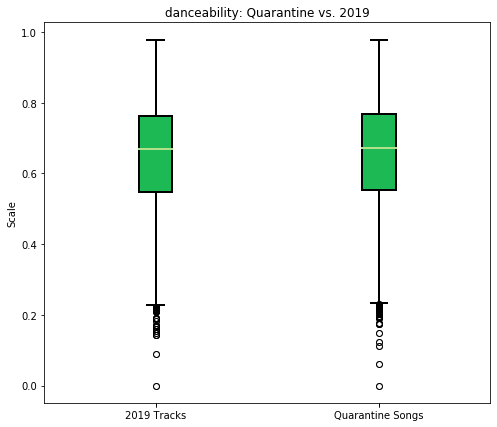

In [71]:
box_plot_comparisons('danceability')

In [72]:
print_means('danceability')

Mean danceability value for 2019:  
0.6489
Mean danceability value for Quarantine:  
0.6566

Difference in means from 2019 to Quarantine:
0.0077
Percent change from 2019 mean to Quarantine mean:
1.18%


<h4> Evaluation of Significance: Danceability </h4> 

In [73]:
print("The difference in mean danceability between Quarantine and 2019 songs:")
print(sample_difference('danceability'))

The difference in mean danceability between Quarantine and 2019 songs:
-0.007651


In [76]:
danceability_data = permuted_diff_list(feature = 'danceability')

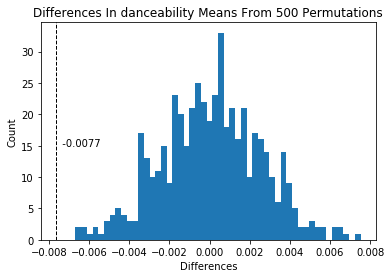

The dashed line represents the difference in our sample means.
The difference in means of our data:  -0.007651


In [77]:
plot_permuted_diff(feature = 'danceability', data = danceability_data, sample = sample_difference('danceability'))
print("The difference in means of our data: ", sample_difference('danceability'))

In [78]:
permutation_p_value(data = modality_data, feature = 'danceability')

Permutation Test Results
.....
p_value:  0.17200000


In [79]:
t_test_means(feature = 'danceability')

T-Test Results
.....
T-Statistic: -3.171799097435241
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000058


<h4> Conclusion: Are we dancing at home? </h4>
<p> The data shows that the average danceability score actually <em> increased </em> by 0.0077. This is suprising, considering that the average energy scored decreased by 0.0637, as illustrated in the previous section. While this is the smallest change we've seen thus far, the change is still classified as statistically significant, yielding a 0.142 p-value from our simulations and a p-value extremely close to 0 from our T-test. Music suitable to dancing appears to be just as appealing alone as it is when allowed to be others. Maybe, without fearing judgement from our peers, people are finally breaking out some moves in the privacy of their home.

---

<h3> 7. Valence </h3>

<p>**Our Hypothesis:** Valence can be considered a somewhat quantitative measure of modality, in the sense that is measures the overall positiveness of a track (while major and minor keys are also associated with positive/negative themes, as well). Thus, like our prediction for modality, the nature of quarantine brings us to predict that valence will decrease significantly.

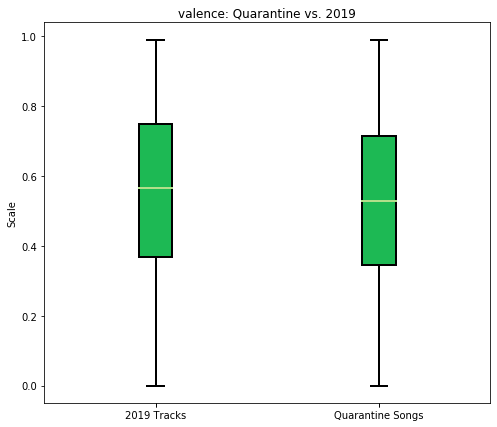

In [80]:
box_plot_comparisons('valence')

In [81]:
print_means('valence')

Mean valence value for 2019:  
0.5529
Mean valence value for Quarantine:  
0.5278

Difference in means from 2019 to Quarantine:
-0.0250
Percent change from 2019 mean to Quarantine mean:
-4.53%


<h4> Evaluation of Significance: Valence </h4> 

In [82]:
print("The difference in mean valence between Quarantine and 2019 songs:")
print(sample_difference('valence'))

The difference in mean valence between Quarantine and 2019 songs:
0.025037


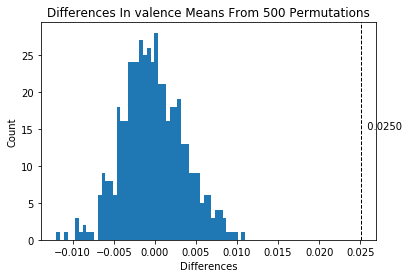

The dashed line represents the difference in our sample means.
The difference in means of our data:  0.025037


In [83]:
valence_data = permuted_diff_list(feature = 'valence')
plot_permuted_diff(feature = 'valence', data = valence_data, sample = sample_difference('valence'))
print("The difference in means of our data: ", sample_difference('valence'))

In [84]:
permutation_p_value(data = valence_data, feature = 'valence')

Permutation Test Results
.....
p_value:  0.00000000


In [85]:
t_test_means(feature = 'valence')

T-Test Results
.....
T-Statistic: 6.7228745306290945
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion: Is there value in valence? </h4>
<p> The mean valence for 2019 songs was 0.5529 increased to a mean of 0.0250 for Quarantine songs, signaling that our hypothesis was correct. Further, with p-values both approacing 0.000000 it is clear that a percentage decrease of this size is certaintly statistically significant. Now that we have analyzed both modality and valence, however, it is interesting that more songs were in minor keys, while the valence decreased significantly. We expected these two variables to increase proportionally.  

---

<h3> 8. Acousticness </h3>

<p>**Our Hypothesis:** Accousticness is an audio feature where we do not expect to see much change as a result of the quarantine. Listening to acoustic music is personal, style choice that is not as clear of a mood indicator as energy, valence, or danceability.

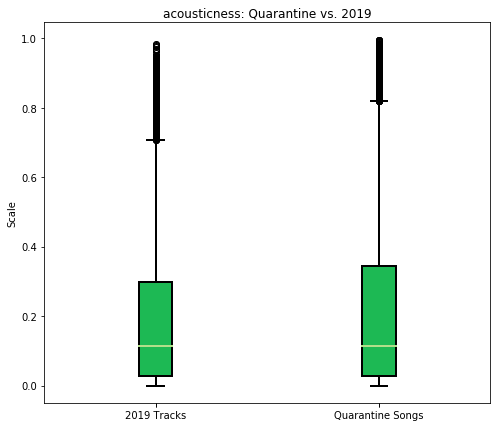

In [86]:
box_plot_comparisons('acousticness')

In [87]:
print_means('acousticness')

Mean acousticness value for 2019:  
0.2017
Mean acousticness value for Quarantine:  
0.2236

Difference in means from 2019 to Quarantine:
0.0219
Percent change from 2019 mean to Quarantine mean:
10.86%


<h4> Evaluation of Significance: Acousticness </h4> 

In [88]:
print("The difference in mean acousticness between Quarantine and 2019 songs:")
print(sample_difference('acousticness'))

The difference in mean acousticness between Quarantine and 2019 songs:
-0.021897


In [89]:
acousticness_data = permuted_diff_list(feature = 'acousticness')

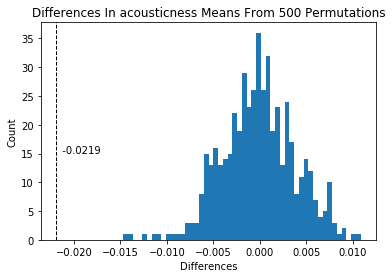

The dashed line represents the difference in our sample means.
The difference in means of our data:  -0.021897


In [90]:
plot_permuted_diff(feature = 'acousticness', data = acousticness_data, sample = sample_difference('acousticness'))
print("The difference in means of our data: ", sample_difference('acousticness'))

In [91]:
permutation_p_value(data = acousticness_data, feature = 'acousticness')

Permutation Test Results
.....
p_value:  0.00000000


In [92]:
t_test_means(feature = 'acousticness')

T-Test Results
.....
T-Statistic: -5.763163457395098
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion: How are the acoustics during quarantine? </h4>
<p> The mean acousticness in 2019 songs decreased by 0.0250 on a 0-1 scale, going from 0.5529 down to 0.5278 mean valence in Quarantine songs. This 4.53% decrease of accousticness in the quarantine dataset from 2019, and given both p-values (simulation and T-test) approached 0, this is a statistically significant change. It is hard to place a reason for this change, perhaps acoustic music is less comforting during a a dreary time? 

---

<h3> 9. Speechiness </h3>

<p>**Our Hypothesis:** Speechiness is a audio feature, similair to acousticness, that we don't believe is going to drastically change during quarentine. A higher average speechiness score would indicate more rap music is being listened to, which is possible, but we predict any increase or decrease will be less significant than the other audio features analyzed. 

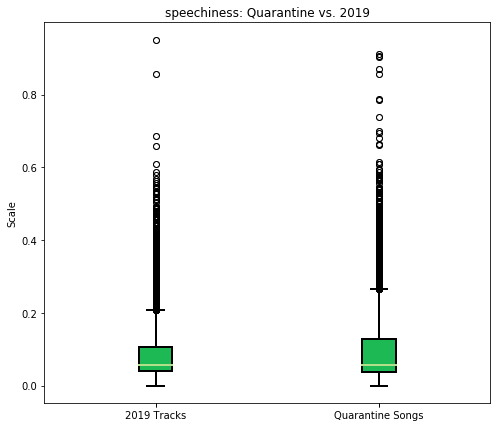

In [93]:
box_plot_comparisons('speechiness')

In [94]:
print_means('speechiness')

Mean speechiness value for 2019:  
0.0926
Mean speechiness value for Quarantine:  
0.1059

Difference in means from 2019 to Quarantine:
0.0133
Percent change from 2019 mean to Quarantine mean:
14.32%


<h4> Evaluation of Significance: Speechiness </h4> 

In [95]:
print("The difference in mean speechiness between Quarantine and 2019 songs:")
print(sample_difference('speechiness'))

The difference in mean speechiness between Quarantine and 2019 songs:
-0.01326


In [96]:
speechiness_data = permuted_diff_list(feature = 'speechiness')

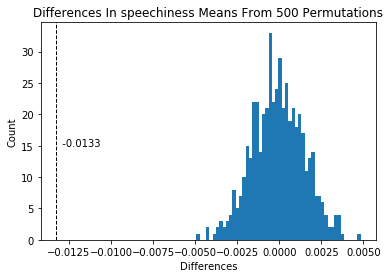

The dashed line represents the difference in our sample means.
The difference in means of our data:  -0.01326


In [97]:
plot_permuted_diff(feature = 'speechiness', data = speechiness_data, sample = sample_difference('speechiness'))
print("The difference in means of our data: ", sample_difference('speechiness'))

In [98]:
permutation_p_value(data = speechiness_data, feature = 'speechiness')

Permutation Test Results
.....
p_value:  0.00000000


In [99]:
t_test_means(feature = 'speechiness')

T-Test Results
.....
T-Statistic: -8.65856334502017
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion: Hard to <em> rap </em> our head around this one... </h4>
<p> There was a 1.3% increase in the average speechiness score of the quarantine dataset, and because both p-values were approximately 0, it's again almost impossible this was due to random chance. Admittidly, the change is not as significant as we've seen with other audio features, but it can't be ignored. People are listening to music with slightly more words. Lyrics, like poetry, often inspire and motivate us - and maybe we are turning to rap music for answers? Our final thoughts will provide a thorough explanation of this theme.

---

<h3> 10. Tempo </h3>

<p>**Our Hypothesis:** Tempo is an audio feature most people understand without a description. Staying consistant with our overarching hypothesis, we expect the average tempo to decrease during quarantine. Sad music is categorically  considered "slow", while happy music is often up-beat and quick. 

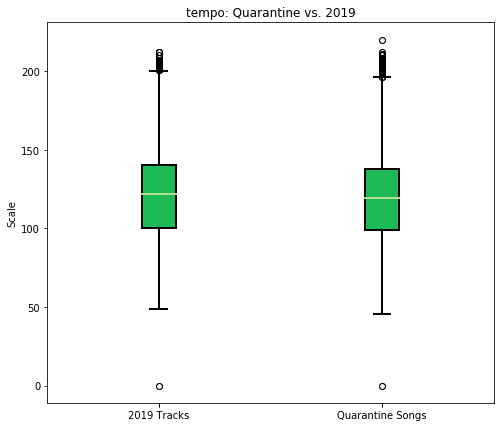

In [100]:
box_plot_comparisons('tempo')

In [101]:
print_means('tempo')

Mean tempo value for 2019:  
123.1222
Mean tempo value for Quarantine:  
120.2803

Difference in means from 2019 to Quarantine:
-2.8419
Percent change from 2019 mean to Quarantine mean:
-2.31%


<h4> Evaluation of Significance: Tempo </h4> 

In [102]:
print("The difference in mean tempo between Quarantine and 2019 songs:")
print(sample_difference('tempo'))

The difference in mean tempo between Quarantine and 2019 songs:
2.841892


In [103]:
tempo_data = permuted_diff_list(feature = 'tempo')

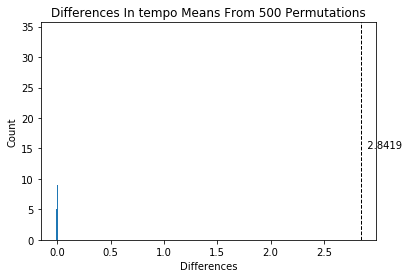

The dashed line represents the difference in our sample means.
The difference in means of our data:  2.841892


In [104]:
plot_permuted_diff(feature = 'tempo', data = energy_data, sample = sample_difference('tempo'))
print("The difference in means of our data: ", sample_difference('tempo'))

In [105]:
permutation_p_value(data = tempo_data, feature = 'tempo')

Permutation Test Results
.....
p_value:  0.00000000


In [106]:
t_test_means(feature = 'tempo')

T-Test Results
.....
T-Statistic: 6.36062944442041
Degress of Freedom: 16240
Critical Value: 1.6449474604860919
p-value: 0.00000000


<h4> Conclusion on Tempo: Could quarantine fo any slower? </h4>
<p> As predicted, the average tempo of the quarantine songs decreased from 2019, by 2.84 beats per second. A change of this size is certainly statistically significant, yielding p-scores approximately equal to 0 on both the simulation and T-Test. While the tempo of a song does not exactly correlate with the mood, this supports the thoery  that people are listening to sadder, slower, and less energetic music while they sit at home. Of course, not all of the audio features supported this theme, but tempo clearly does. 

---
---

<h2> Concluding Thoughts </h2>

<p> So, how has our music streaming changed since being in quarantine? Each of the ten different audio features we’ve analyzed offered unique insight into our listening choices, and through the analysis of our streaming data, we’ve been able to illustrate exactly how these choices have fluctuated. </p>
 
<p>The most notable and statistically significant discovery of the quantitative audio features was the decrease in energy. While this drop was initially hypothesized, it is interesting to actually see evidence of this in our data, confirming, with numbers, the real-life effects of quarantine that we see in our day-to-day lives. Qualitatively, the proportion of the songs that we listen to that are explicit has grown by 14.41% since 2019; a statistically significant difference that forces us to wonder why people are choosing to listen to more explicit songs than before. Other variables like speechiness and acousticness had small increases, while tempo and valence had smaller decreases, giving us the opportunity to make inferences about why quarantine is affecting these features. </p>
 
<p> Because our statistical significance evaluations were methodical, we are confident that the data increases and decreases reflect the actual listening choices of people in quarantine. However, we are less confident in our causation explanations. For example, danceability’s slight increase does not seem logical. Likewise, the proportion of songs with a major mode increased.  Both of these results go against our hypothesis that people are listening to slower, relaxed music. If we had analyzed datasets from 2018, 2017, 2016, and even 2015, we would get a better understanding of the average variability of features like danceability from year to year, which might explain the seemingly nonsensical increases of danceability and modality. </p> 
 
<p>Another improvement of this research opportunity would be to analyze what genres and radio stations people are listening to more often.  Spotify provides a number of recommendation resources and pre-made playlists. Our analysis only looked at self-made playlists, leaving out most of the music available on Spotify. The amount people are listening to these unique parts of the platform is always changing, providing room for further research. </p>
 
<p>This research project has been a rewarding and challenging journey. It’s provided hands-on experience in both web scraping using an API, as well as analyzing complex data. We are proud of our work, and grateful to the caring support-system INFO 2950 provides to make it all possible. </p>

<h2> Source Code </h2>

<p>Link to our GitHub Repository: https://github.com/kzo2/Info-2950-Final-Project </p>

<h2> Acknowledgements </h2>

- The data web scraping, as well as manipulation and understanding of audio features, was made possible by the Spotify's Web API Reference Documentation:
https://developer.spotify.com/documentation/web-api/ </p>

In [41]:
%%javascript
let words = 0;
Jupyter.notebook.get_cells().forEach(cell => {if (cell.cell_type == "markdown") { words += cell.element[0].innerText.split(" ").length }})
element.text("markdown words: " + words)

<IPython.core.display.Javascript object>